# I.Run



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 0 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.03 MiB | 21.18 MiB/s, done.
Resolving deltas: 100% (10365/10365), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
 # make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void*

In [ ]:
!cp /content/gdrive/MyDrive/yolov4/yolov4-obj.cfg /content/darknet/cfg
!cp /content/gdrive/MyDrive/yolov4/obj.data /content/darknet/data
!cp /content/gdrive/MyDrive/yolov4/obj.names /content/darknet/data
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


#2>Run

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv 

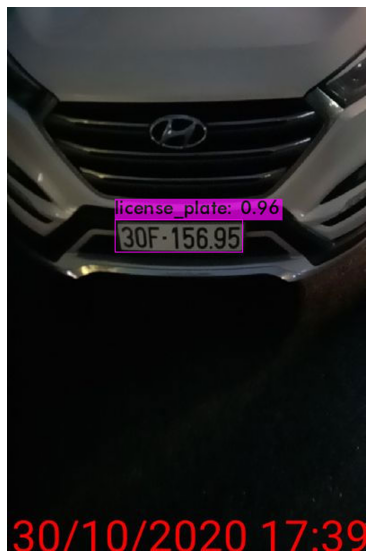

In [ ]:
x='1' #Name of the picture
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/yolov4/backup/yolov4-obj_5000.weights /content/gdrive/MyDrive/LVTN_2/Image/car1.jpg -thresh 0.3 -dont_show -ext_output </content/darknet> /content/gdrive/MyDrive/LVTN_2/Result/Result1.txt 
imShow('predictions.jpg')
img_path='/content/gdrive/MyDrive/LVTN_2/Image/car'+x+'.jpg'
result_path='/content/gdrive/MyDrive/LVTN_2/Result/Result/'+x+'.jpg'
crop_path='/content/gdrive/MyDrive/LVTN_2/Crop/'+x+'.jpg'
digit_path='/content/gdrive/MyDrive/LVTN_2/Digit/'+x+'.jpg'
binary_path='/content/gdrive/MyDrive/LVTN_2/Binary/'+x+'.jpg'
import cv2
import re
prediction=cv2.imread('/content/darknet/predictions.jpg')
cv2.imwrite('/content/gdrive/MyDrive/LVTN_2/Detector/'+x+'.jpg',prediction)
path='/content/gdrive/MyDrive/LVTN_2/Result/Result'+x+'.txt'


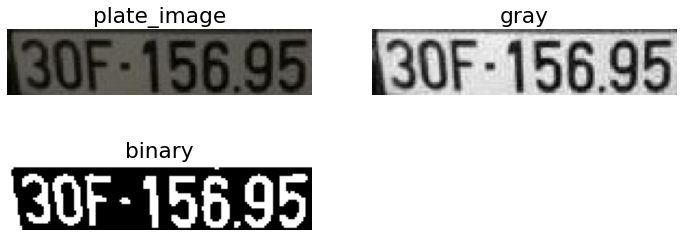

In [ ]:
myfile=open(path,'r')
lines=myfile.readlines()
pattern= "license_plate"
for line in lines:
  if re.search(pattern,line):
    Cord_Raw=line
Cord=Cord_Raw.split("(")[1].split(")")[0].split("  ")
x_min=int(Cord[1])
x_max=x_min + int(Cord[5])
y_min=int(Cord[3])
y_max=y_min+ int(Cord[7])
img = cv2.imread(img_path)
crop_img = img[y_min+2:y_max-2, x_min+1:x_max-1]
cv2.imwrite(crop_path,crop_img)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from os.path import splitext,basename
from keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob
import keras
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from google.colab.patches import cv2_imshow
LpImg=cv2.imread(crop_path)
if (len(LpImg)): #check if there is at least one license image
    plate_image = cv2.cvtColor(LpImg, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    binary = cv2.threshold(gray,180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] #if =>180 ->0,if <180 ->255
# visualize results 
cv2.imwrite(binary_path,binary)   
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, binary]
plot_name = ["plate_image","gray","binary"]
for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

True

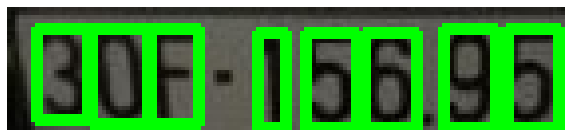

In [ ]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts
cont, _  = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cont=sort_contours(cont)
shape=plate_image.shape[1]/plate_image.shape[0]
if shape >= 2:
  sample=0.45
  take_second=0.8
else:
  sample=0.25
  take_second=0.35
test_roi = plate_image.copy()
line_1=[]
line_2=[]
S_1=1
S_2=1
A_1=0
A_2=0
digit_w, digit_h = 40,80 # define standard width and height of character
for c in cont:
    (x, y, w, h) = cv2.boundingRect(c)
    img=binary[y:y+h,x:x+w]
    if y<plate_image.shape[0]*take_second: # Phân biệt kí tụ ở dòng 1 hay dòng 2
       #print(w,h)
       #cv2_imshow(img)
       white=np.sum(img==255)
       A_1=S_1 # A = h before
       if w>0.3*plate_image.shape[1] or white>=0.8*w*h or h/w>6 or x==0 :
        S_1=1
       else:
        S_1=h
       ratio = h/w
       if 1.2<=ratio<=5.5:
         if x != 0 and x+w!= plate_image.shape[1]:
           if white<0.8*w*h:
             if S_1>=0.89*A_1:
               if h/plate_image.shape[0]>= sample: 
            # Draw bounding box arround digit number
                 cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)
            # Sperate number and gibe prediction
                 curr_num = binary[y:y+h,x:x+w]
                 curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                 _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                 line_1.append(curr_num)
    else:
      white=np.sum(img==255)
      A_2=S_2 # A = h before
      if w>0.3*plate_image.shape[1] or white>=0.8*w*h or h/w>5.5 or x==0 :
        S_2=1
      else:
        S_2=h
      ratio = h/w
      if 1.2<=ratio<=5.5:
        if x != 0 and x+w!= plate_image.shape[1]:
            if white<0.8*w*h:
              if S_2>=0.89*A_2:# Only select contour with defined ratio
                 if h/plate_image.shape[0]>= sample: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arround digit number
                   cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)
            # Sperate number and gibe prediction
                   curr_num = binary[y:y+h,x:x+w]
                   curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                   _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                   line_2.append(curr_num)         
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
cv2.imwrite(digit_path,test_roi)

[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


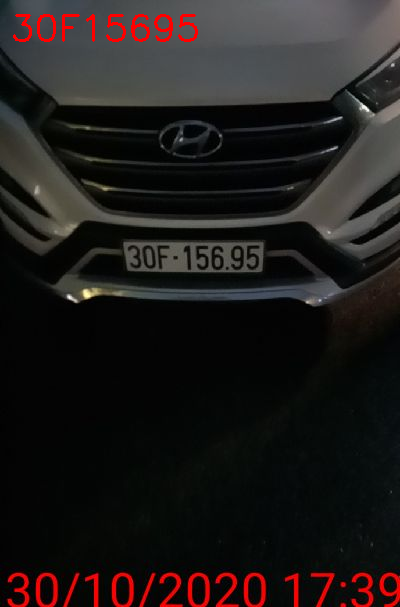

30F15695


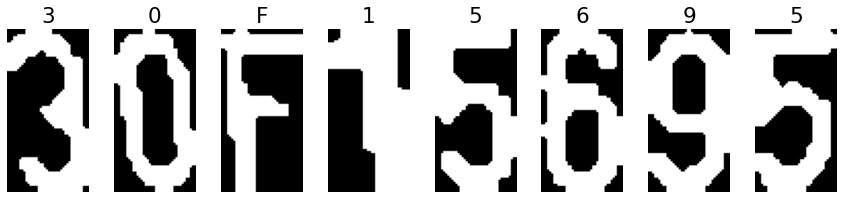

In [ ]:
# Load model architecture, weight and labels
json_file = open('/content/gdrive/MyDrive/LVTN/Model/MobileNets_Train.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('/content/gdrive/MyDrive/LVTN/Model/License_Train_2.h5')
print("[INFO] Model loaded successfully...")
labels = LabelEncoder()
labels.classes_ = np.load('/content/gdrive/MyDrive/LVTN/Model/Character_Train_2.npy')
print("[INFO] Labels loaded successfully...")
# pre-processing input images and pedict with model
def predict_from_model(image,model,labels):
    image = cv2.resize(image,(80,80))
    image = np.stack((image,)*3, axis=-1)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction
fig = plt.figure(figsize=(15,3))
cols = len(line_1+line_2)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)
first_string=''
second_string=''
final_string =''
i=0
for i,character in enumerate(line_1):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    first_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')
for a,character in enumerate(line_2):
    title = np.array2string(predict_from_model(character,model,labels))
    second_string+=title.strip("'[]")
    if i==0:
      fig.add_subplot(grid[a])
    else:
     fig.add_subplot(grid[i+a+1])
     plt.title('{}'.format(title.strip("'[]"),fontsize=20))
     plt.axis(False)
     plt.imshow(character,cmap='gray')
if shape >= 2:
  final_string=first_string+second_string
else:
  final_string=first_string+'-'+second_string
img=cv2.imread(img_path)
img=cv2.putText(img,final_string, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.2, color=(0, 0, 255), thickness=2)
cv2.imwrite(result_path,img)
cv2_imshow(img)
print(final_string)